To start, import the numpy library and, since we will be plotting data, the matplotlib.pyplot module,

In [1]:
# import functions
import matplotlib.pyplot as plt
import numpy as np

import json # import this package only to visualize the dictionary contents

Also, import the tfer_pma module, which contains the relevant functions to evaluate the transfer function using the analytical methods from Sipkens, Olfert, and Rogak (2020a):

In [2]:
import tfer_pma # import relevant functions to evaluate the PMA transfer function

Now define some fundamental properties, including the mass setpoint, `m_star`; the masses at which to evaluate the transfer function, `m`; the mobility diameter of the particles, `d` (note, using `d = None` will result in using the mass-mobility relation, using the values in the `prop` dictionary defined below); and the integer charge state at which to evaluate the transfer function, `z`:

In [3]:
# define input variables
m_star = 0.01e-18
m = np.arange(0.8,1.2,0.001) * m_star # numpy array spanning 80 to 120% m_star
d = None # mobility diameter (none uses mass-mobility relation)
z = 1. # integer charge state

Next, generate a dictionary that contains the properties of the particle mass analyzer, such as its geometry dimensions. Here, we also modify the default mass-mobility parameters to be used in the remainder of the program:  

In [4]:
prop = tfer_pma.prop_pma() # get default PMA properties

# Modify some of the properties, 
# in this case for the mass-mobility relation.
rho_eff = 900; # effective density
prop['rho0'] = rho_eff * np.pi / 6; # copy mass-mobility relation info (only used to find Rm)
prop['Dm'] = 3

Now we generate a setpoint dictionary. This quantity is crucial in this program, taking the `prop` dictionary generated above and two name-value pair arguments that specify the setpoint for the PMA. For example, using the mass setpoint `m_star` above and a resolution (as defined by Reavell, Symonds, and Rushton (2011)) of 10, we can compute the other relevant parameters to describe the PMA setpoint using:

In [5]:
sp,_ = tfer_pma.get_setpoint(prop, 'm_star', m_star, 'Rm', 10)
print(json.dumps(sp, indent = 2)) # print dictionary in JSON format

{
  "m_star": 1e-20,
  "V": 24.436513731427898,
  "omega": 2543.856712233345,
  "omega1": 2583.485676310513,
  "Rm": 10,
  "m_max": 1.1e-20,
  "alpha": 175.98499973865952,
  "beta": 8.667002435658672,
  "omega2": 2505.198231573831
}


The output dictionary will also contain information like the voltage, `sp['V']`; angular speeds of the inner and outer electrodes, `sp['omega1']` and `sp['omega2']`, respectively; among other relevant properties. One can also use other pairings, such as specifying the voltage and centerline rotation speed: 

In [6]:
sp,_ = tfer_pma.get_setpoint(prop, 'V', 24.44, 'omega', 2543.9)
print(json.dumps(sp, indent = 2)) # print dictionary in JSON format

Finding resolution...
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 40
Complete.
 
{
  "m_star": 1.0001086291978118e-20,
  "V": 24.44,
  "omega": 2543.8999999999996,
  "omega1": 2583.529638427001,
  "Rm": 10.00079345703125,
  "alpha": 175.9879944032437,
  "beta": 8.667149918485526,
  "omega2": 2505.240861504971,
  "m_max": 1.1001115573149468e-20
}


This should give a similar setpoint to the preceding statement, but specifies the setpoint in a different way. It is worth noting that most combinations of two of these parameters will be sufficient to specify to setpoint, with the exception of combining the rotational speed or voltage with a resolution, which will result in an error. 

Finally, let's evaluate the transfer function for some of the cases considered in Sipkens, Olfert, and Rogak (2020a). First, consider **Case 1S**, where the fluid velocity profile is approximated using a 1st-order Taylor series expansion about the equilibrium radius. To do so: 

In [7]:
# evaluate the transfer functions
Lambda_1S,_ = tfer_pma.tfer_1S(sp, m, d, z, prop)

Invoking mass-mobility relation to determine Zp.


Here, `Lambda_1S` will be a numpy array of the same length as `m`. The other expressions from Sipkens, Olfert, and Rogak (2020a) can be realized using different methods from tfer_pma module, generally adopting intuitive names corresponding to the case codes from that work. For example, for **Case 1C**: 

In [8]:
Lambda_1C,_ = tfer_pma.tfer_1C(sp, m, d, z, prop)

Invoking mass-mobility relation to determine Zp.


Adding diffusion to this scenario can be done by adding `_diff` to the end of the method name above: 

In [9]:
Lambda_1C_diff,_ = tfer_pma.tfer_1C_diff(sp, m, d, z, prop)

Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.


To finish, plot the evaluate transfer functions,, with the result resembling some of the plots in Sipkens, Olfert, and Rogak (2020a):

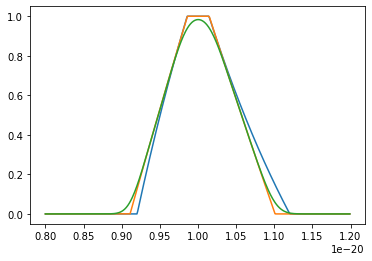

In [10]:
# plot the various transfer functions 
plt.plot(m, Lambda_1S)
plt.plot(m, Lambda_1C)
plt.plot(m, Lambda_1C_diff)
if prop['omega_hat']==1:
    plt.plot(m, Lambda_W1)
    plt.plot(m, Lambda_W1_diff)
plt.show()

We can also evaluate the transfer function at different integer charge states, by changing the third argument to these functions: 

Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.
Invoking mass-mobility relation to determine Zp.


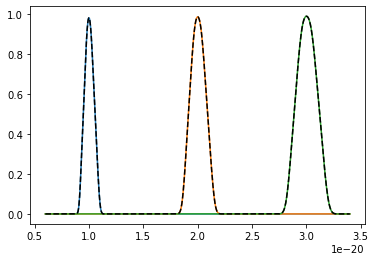

In [11]:
# generate second plot demonstrating multiple charging
m123 = np.arange(0.6,3.4,0.001) * m_star
Lambda_1C_z1,_ = tfer_pma.tfer_1C_diff(sp, m123, d, 1, prop)
Lambda_1C_z2,_ = tfer_pma.tfer_1C_diff(sp, m123, d, 2, prop)
Lambda_1C_z3,_ = tfer_pma.tfer_1C_diff(sp, m123, d, 3, prop)

plt.plot(m123, Lambda_1C_z1)
plt.plot(m123, Lambda_1C_z2)
plt.plot(m123, Lambda_1C_z3)
plt.plot(m123, Lambda_1C_z1 + Lambda_1C_z2 + Lambda_1C_z3, 'k--')
    # different widths stem from resolution only applying to first peak
plt.show()